In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('./datasets/BrainTumor.csv')
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [11]:
df = df.drop('Image', axis=1)
df.head()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [12]:
df.shape

(3762, 14)

In [13]:
df.dtypes

Class                   int64
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
dtype: object

In [14]:
df['Class'].value_counts()

Class
0    2079
1    1683
Name: count, dtype: int64

In [15]:
df.isnull().values.any()

False

In [16]:
x = df.drop('Class', axis=1)
y = df['Class']

**Also you can normalize the dataset:**

`from scipy.stats import zscore`

`scale = x.apply(zscore)  # scaled_x`

In [19]:
x.describe()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1000)

In [21]:
from sklearn.neighbors import KNeighborsClassifier 

model = KNeighborsClassifier(n_neighbors=7, weights='distance')

In [22]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [23]:
y_pred_test = model.predict(x_test)

In [24]:
print(np.array(y_test)[:15])
print(np.array(y_pred_test)[:15])

[1 0 1 0 0 1 0 1 1 0 1 0 0 1 1]
[1 0 1 0 0 1 0 1 0 0 1 0 0 1 1]


In [25]:
print('Score:', np.around(model.score(x_test, y_test)*100, 2), '%')

Score: 82.55 %


In [26]:
from sklearn.model_selection import cross_val_score
cross = np.around(cross_val_score(model, x, y, cv=10)*100, 2)
print('Average Cross Val Score:', np.around(np.mean(cross), 2), '%')

Average Cross Val Score: 82.96 %


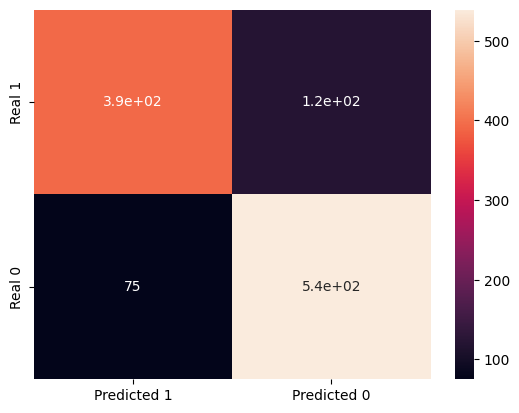

In [27]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test, y_pred_test, labels=[1, 0])
confusion_df = pd.DataFrame(confusion,
                            index=['Real 1', 'Real 0'],
                            columns=['Predicted 1', 'Predicted 0'])
sns.heatmap(confusion_df, annot=True)
plt.show()

In [29]:
k = 50
scores = np.zeros(shape=(k))

for n in range (1, k + 1):
    KNNs = KNeighborsClassifier(n_neighbors=n, weights='distance')
    score_n = cross_val_score(KNNs, x, y, cv=10)
    scores[n-1] = score_n.mean()

scores

array([0.82190869, 0.82190869, 0.83120803, 0.83732081, 0.83120944,
       0.83572648, 0.82961369, 0.83546193, 0.83014702, 0.83625698,
       0.8290846 , 0.83067893, 0.82855198, 0.82563068, 0.82616118,
       0.82536472, 0.8253619 , 0.82349879, 0.81924417, 0.81844771,
       0.82057537, 0.82057678, 0.81765196, 0.81871861, 0.81765196,
       0.81685549, 0.81579096, 0.81552571, 0.8136633 , 0.81393067,
       0.81313491, 0.81419733, 0.81206897, 0.81260229, 0.81499379,
       0.81393137, 0.81233563, 0.80808313, 0.80914696, 0.80595406,
       0.80675546, 0.80356327, 0.80542638, 0.80117106, 0.80090722,
       0.80117388, 0.80064197, 0.80010723, 0.80064056, 0.80063844])

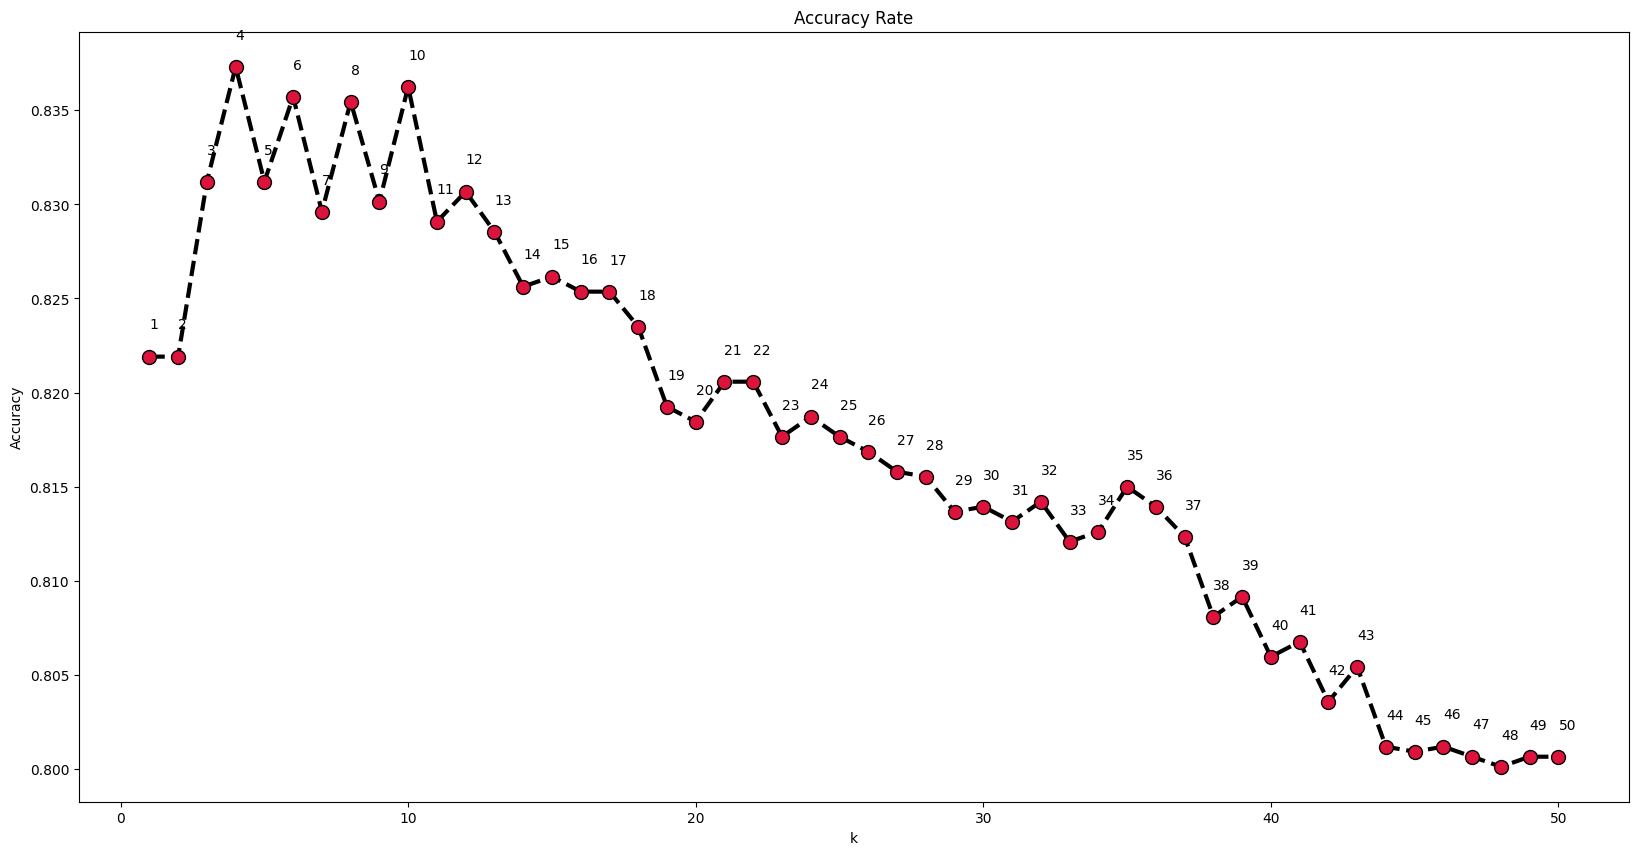

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(range(1, k + 1), scores,
        color='k', linestyle='dashed', lw=3,
        marker='o', markerfacecolor='crimson', markersize=10)

annotations = [f"{n}" for n in range(1, k + 1)]

for xi, yi, text in zip(range(1, k + 1), scores, annotations):
    ax.annotate(text, xy=(xi, yi), xycoords='data', xytext=(0, 20),
                textcoords='offset points')

plt.title('Accuracy Rate')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

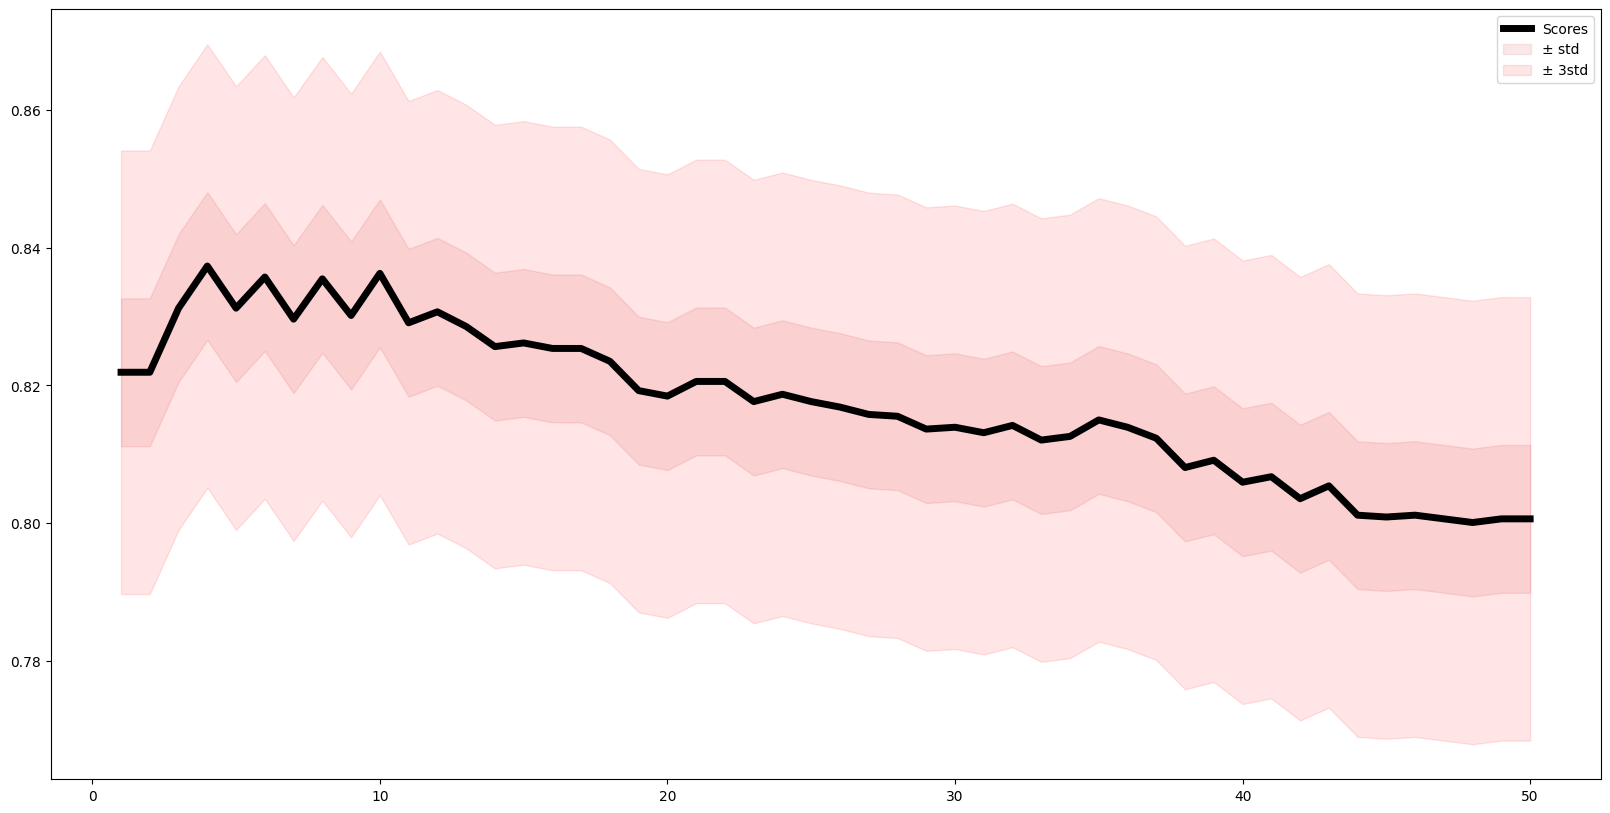

In [41]:
plt.figure(figsize=(20, 10))
accuracy_std = np.std(scores)
plt.plot(range(1, k + 1), scores, color='k', lw=5, label='Scores')
plt.fill_between(range(1, k + 1), scores - accuracy_std, scores + accuracy_std,
                 alpha=0.10, color='tab:red', label='± std')
plt.fill_between(range(1, k + 1), scores - 3*accuracy_std, scores + 3*accuracy_std,
                 alpha=0.10, color='red', label='± 3std')
plt.legend()
plt.show()

In [42]:
new_model = KNeighborsClassifier(n_neighbors=10, weights='distance')
new_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [43]:
print('Score:', np.around(new_model.score(x_test, y_test)*100, 2), '%')

Score: 82.46 %


In [44]:
evaluation = metrics.classification_report(y_test, new_model.predict(x_test), labels=[1, 0])
print(evaluation)

              precision    recall  f1-score   support

           1       0.85      0.75      0.80       515
           0       0.81      0.88      0.85       614

    accuracy                           0.82      1129
   macro avg       0.83      0.82      0.82      1129
weighted avg       0.83      0.82      0.82      1129

